### Import libraries

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,make_scorer,roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score,StratifiedKFold

### Import dataset

In [45]:
import pandas as pd

df = pd.read_csv('nse.csv')

print(df.to_string()) 

           Date     Code                                      Name   12m Low  12m High   Day Low  Day High Day Price  Previous  Change Change%      Volume Adjusted Price
0      3-Jan-22     EGAD                               Eaagads Ltd        10        15      13.5      13.8      13.5      13.5       -       -       4,000              -
1      3-Jan-22     KUKZ                                Kakuzi Plc       355       427       385       385       385       385       -       -           -              -
2      3-Jan-22     KAPC                   Kapchorua Tea Kenya Plc        80       101      99.5      99.5      99.5      95.5       4   4.19%         100              -
3      3-Jan-22     LIMT                            Limuru Tea Plc       260       360       320       320       320       320       -       -           -              -
4      3-Jan-22     SASN                                Sasini Plc     16.75      22.6      18.7      18.7      18.7      18.7       -       -        

### Data Preprocessing

In [46]:
## Preprocessing the string data
## eg remove ',' in thousands: 1,000.00
## Converting it to float data typedf

df['Previous'] = df['Previous'].str.replace(',', '').astype(float)
df['12m Low'] = df['12m Low'].str.replace(',', '').astype(float)
df['12m High'] = df['12m High'].str.replace(',', '').astype(float)
df['Day Low'] = df['Day Low'].str.replace(',', '').astype(float)
df['Day High'] = df['Day High'].str.replace(',', '').astype(float)
df['Day Price'] = df['Day Price'].str.replace(',', '').astype(float)


### Train and Test Split

In [47]:
## train-test split

## X is the predictor variable
X = df[['Previous','12m Low', '12m High', 'Day Low', 'Day High']]
## y is the target variable
y = df['Day Price']

split = int(0.8 * len(df))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [48]:
# Display the shape of the training data
print("Training Data Shapes:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Display the shape of the testing data
print("\nTesting Data Shapes:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

Training Data Shapes:
X_train shape: (5385, 5)
y_train shape: (5385,)

Testing Data Shapes:
X_test shape: (1347, 5)
y_test shape: (1347,)


In [49]:
unique_companies = df['Name'].unique()

In [50]:
print("There are {number} unique companies".format(number=len(unique_companies)))

There are 66 unique companies


In [51]:
unique_companies

array(['Eaagads Ltd', 'Kakuzi Plc', 'Kapchorua Tea Kenya Plc',
       'Limuru Tea Plc', 'Sasini Plc', 'Williamson Tea Kenya Plc',
       'Car and General (K) Ltd', 'ABSA Bank Kenya Plc', 'BK Group Plc',
       'Co-operative Bank of Kenya Ltd', 'Diamond Trust Bank Kenya Ltd',
       'Equity Group Holdings Plc', 'HF Group Ltd', 'I & M Holdings Plc',
       'KCB Group Plc', 'National Bank of Kenya Ltd', 'NCBA Group Plc',
       'Stanbic Holdings Plc', 'Standard Chartered Bank Kenya Ltd',
       'Deacons (East Africa) Plc', 'Eveready East Africa Ltd',
       'Express Kenya Plc', 'Homeboyz Entertainment Plc',
       'Kenya Airways Plc', 'Longhorn Publishers Plc',
       'Nairobi Business Ventures Ltd', 'Nation Media Group Plc',
       'Sameer Africa Plc', 'Standard Group Plc',
       'TPS Eastern Africa (Serena) Ltd', 'Uchumi Supermarket Plc',
       'WPP ScanGroup Plc', 'ARM Cement Plc', 'Bamburi Cement Ltd',
       'Crown Paints Kenya Plc', 'East African Cables Ltd',
       'East African 


 Model for Mumias Sugar Company Ltd:
MSE (Train): 0.0
MSE (Test): 0.0 



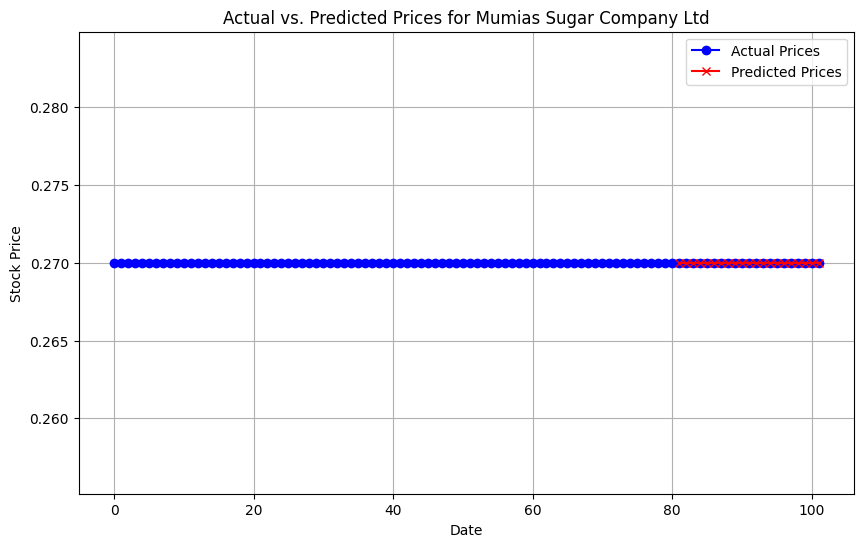


 Model for Unga Group Ltd:
MSE (Train): 0.006085912947297802
MSE (Test): 0.00023565506074064787 



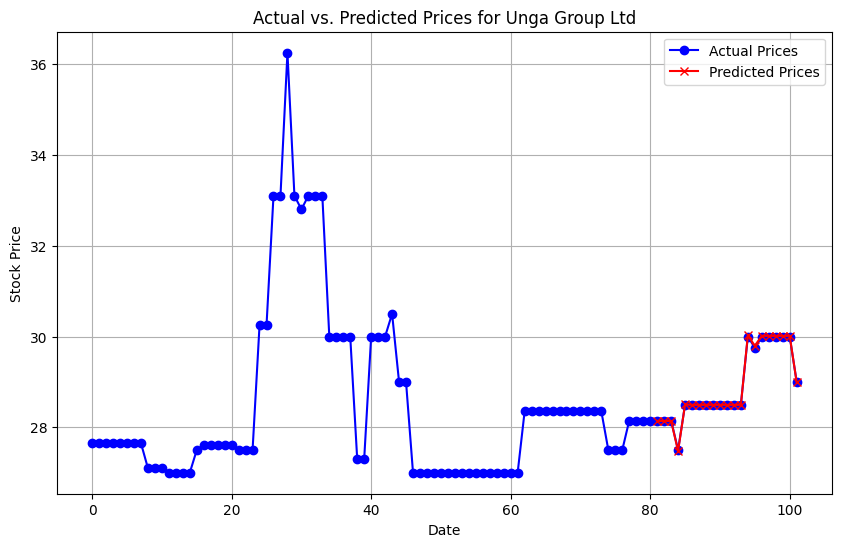


 Model for Safaricom Plc:
MSE (Train): 0.03544623223724531
MSE (Test): 0.04784362636654669 



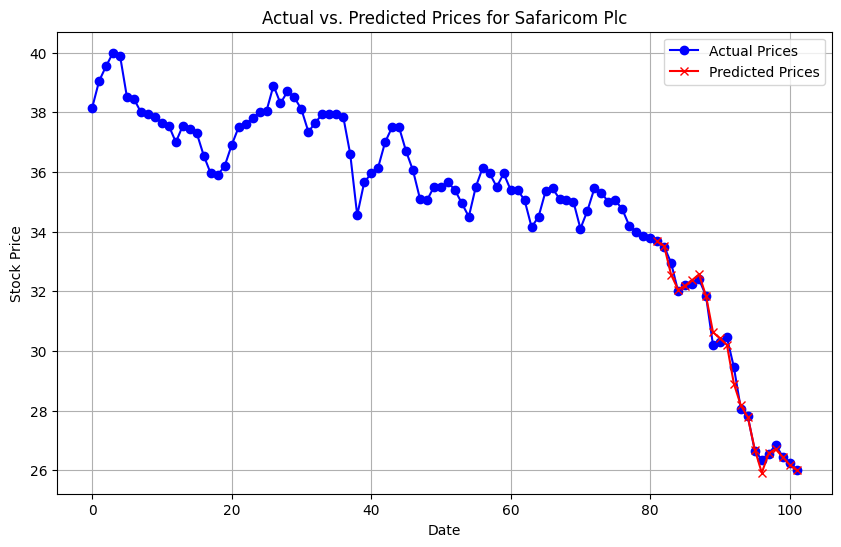


 Model for Stanlib Fahari Income-REIT:
MSE (Train): 0.00396504107143361
MSE (Test): 0.0072242112044896886 



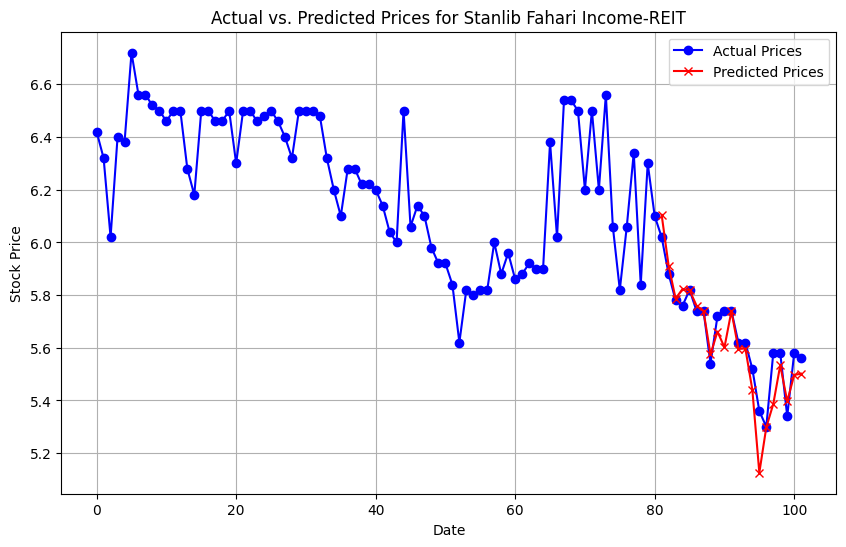


 Model for ABSA NewGold ETF:
MSE (Train): 0.0
MSE (Test): 0.0 



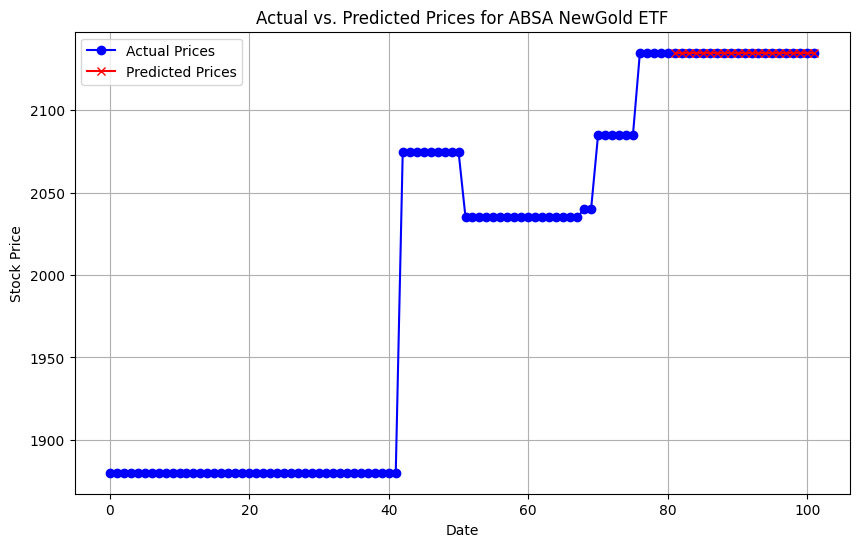

In [52]:
for company in unique_companies[-5:]:
    company_data = df[df['Name'] == company]


    # Use the 'Previous_Price','12m Low', '12m High', 'Day Low', and 'Day High' as the features
    X = company_data[['Previous','12m Low', '12m High', 'Day Low', 'Day High']]
    y = company_data['Day Price']


    # Split data into training and testing sets
    split = int(0.8 * len(company_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Train the model
    model = LinearRegression()

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model.fit(X_train, y_train)

    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Evaluate Model Performance
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    print(f'\n Model for {company}:')
    print(f'MSE (Train): {mse_train}')
    print(f'MSE (Test): {mse_test} \n')

    company_data = company_data.reset_index()

    plt.figure(figsize=(10, 6))

    # Plot actual prices
    plt.plot(company_data.index, company_data['Day Price'], label='Actual Prices', marker='o', color='blue')

    # Plot predicted prices
    plt.plot(company_data.index[-len(y_pred_test):], y_pred_test, label='Predicted Prices', marker='x', color='red')

    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(f'Actual vs. Predicted Prices for {company}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Classification Problem



In [53]:
import pandas as pd

df = pd.read_csv('nse.csv')

print(df.to_string()) 

           Date     Code                                      Name   12m Low  12m High   Day Low  Day High Day Price  Previous  Change Change%      Volume Adjusted Price
0      3-Jan-22     EGAD                               Eaagads Ltd        10        15      13.5      13.8      13.5      13.5       -       -       4,000              -
1      3-Jan-22     KUKZ                                Kakuzi Plc       355       427       385       385       385       385       -       -           -              -
2      3-Jan-22     KAPC                   Kapchorua Tea Kenya Plc        80       101      99.5      99.5      99.5      95.5       4   4.19%         100              -
3      3-Jan-22     LIMT                            Limuru Tea Plc       260       360       320       320       320       320       -       -           -              -
4      3-Jan-22     SASN                                Sasini Plc     16.75      22.6      18.7      18.7      18.7      18.7       -       -        

In [54]:
df['Previous'] = df['Previous'].str.replace(',', '').astype(float)
df['12m Low'] = df['12m Low'].str.replace(',', '').astype(float)
df['12m High'] = df['12m High'].str.replace(',', '').astype(float)
df['Day Low'] = df['Day Low'].str.replace(',', '').astype(float)
df['Day High'] = df['Day High'].str.replace(',', '').astype(float)
df['Day Price'] = df['Day Price'].str.replace(',', '').astype(float)

In [57]:
df['Change'] = pd.to_numeric(df['Change'], errors='coerce')
df.loc[:, 'PriceMovement'] = (df['Change'] > 0).astype(int)

print(df.head())

       Date  Code                     Name  12m Low  12m High  Day Low  \
0  3-Jan-22  EGAD              Eaagads Ltd    10.00      15.0     13.5   
1  3-Jan-22  KUKZ               Kakuzi Plc   355.00     427.0    385.0   
2  3-Jan-22  KAPC  Kapchorua Tea Kenya Plc    80.00     101.0     99.5   
3  3-Jan-22  LIMT           Limuru Tea Plc   260.00     360.0    320.0   
4  3-Jan-22  SASN               Sasini Plc    16.75      22.6     18.7   

   Day High  Day Price  Previous  Change Change% Volume Adjusted Price  \
0      13.8       13.5      13.5     NaN       -  4,000              -   
1     385.0      385.0     385.0     NaN       -      -              -   
2      99.5       99.5      95.5     4.0   4.19%    100              -   
3     320.0      320.0     320.0     NaN       -      -              -   
4      18.7       18.7      18.7     NaN       -      -              -   

   PriceMovement  
0              0  
1              0  
2              1  
3              0  
4              

/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/naive_bayes.py:510: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/naive_bayes.py:511: RuntimeWarning: invalid value encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21


 Cross Validation for  Mumias Sugar Company Ltd
Cross-Validation Scores: [1. 1. 1. 1.]
Mean Accuracy: 1.0
Max Accuracy: 1.0





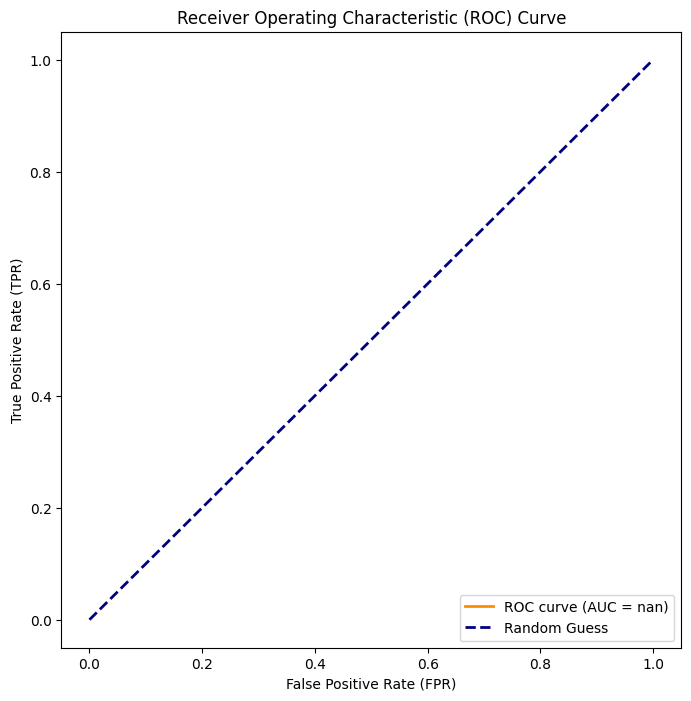

/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92        18
           1       0.00      0.00      0.00         3

    accuracy                           0.86        21
   macro avg       0.43      0.50      0.46        21
weighted avg       0.73      0.86      0.79        21


 Cross Validation for  Unga Group Ltd
Cross-Validation Scores: [0.84615385 0.88461538 0.84       0.8       ]
Mean Accuracy: 0.8426923076923076
Max Accuracy: 0.8846153846153846





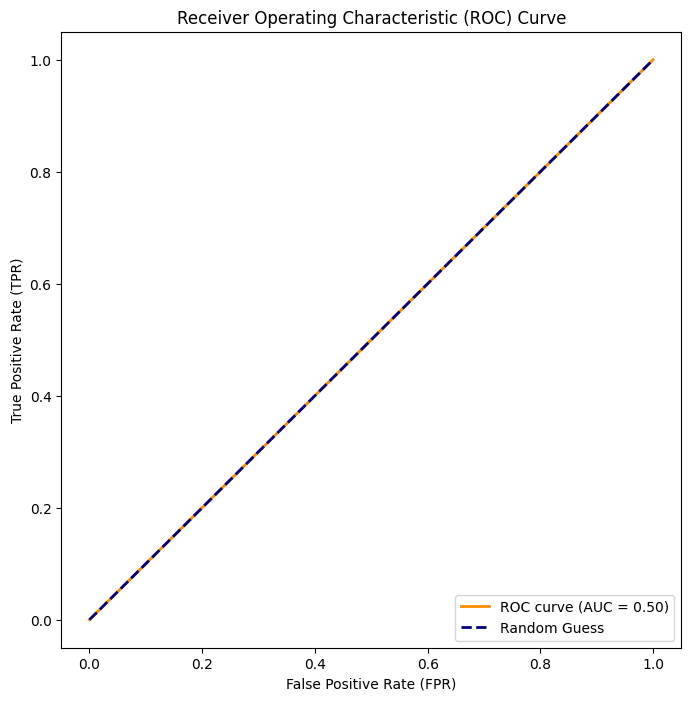

/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        14
           1       0.00      0.00      0.00         7

    accuracy                           0.67        21
   macro avg       0.33      0.50      0.40        21
weighted avg       0.44      0.67      0.53        21


 Cross Validation for  Safaricom Plc
Cross-Validation Scores: [0.57692308 0.5        0.48       0.48      ]
Mean Accuracy: 0.5092307692307692
Max Accuracy: 0.5769230769230769





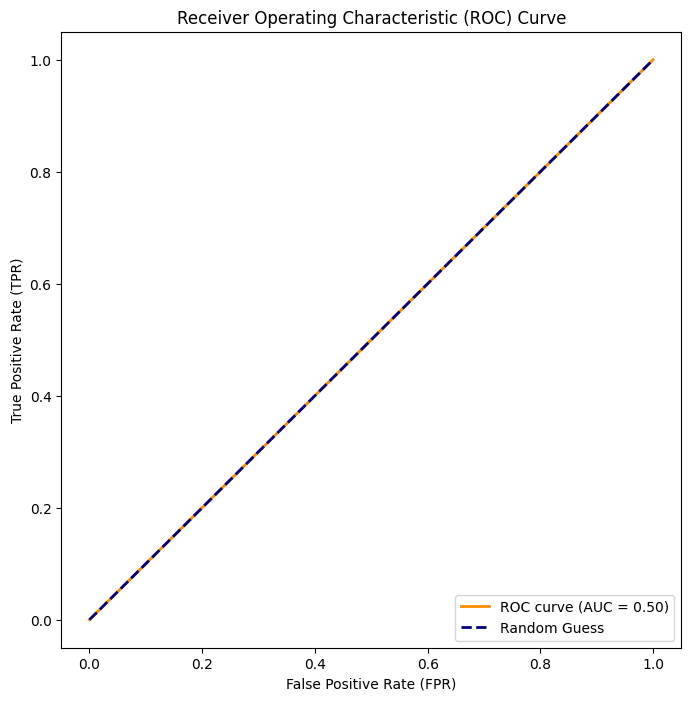

              precision    recall  f1-score   support

           0       0.83      0.62      0.71        16
           1       0.33      0.60      0.43         5

    accuracy                           0.62        21
   macro avg       0.58      0.61      0.57        21
weighted avg       0.71      0.62      0.65        21


 Cross Validation for  Stanlib Fahari Income-REIT
Cross-Validation Scores: [0.65384615 0.76923077 0.6        0.64      ]
Mean Accuracy: 0.6657692307692308
Max Accuracy: 0.7692307692307693





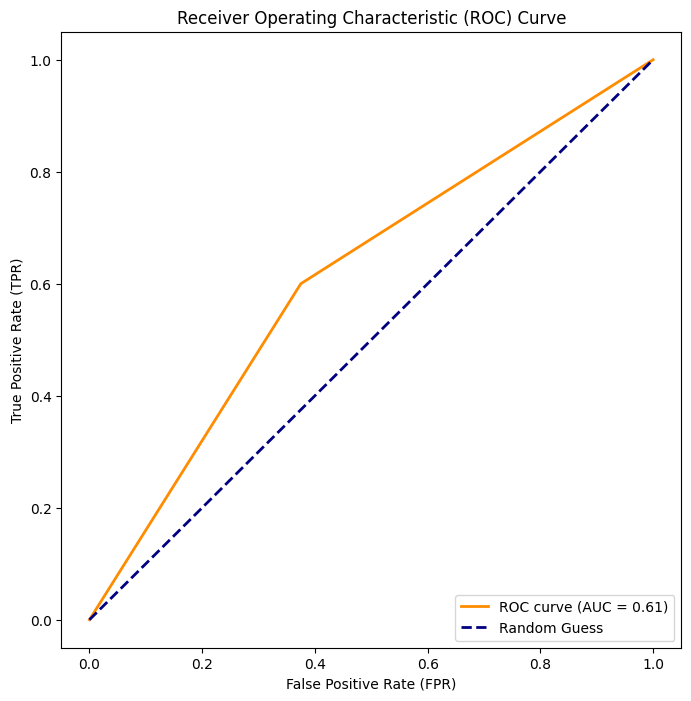

/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/senor/projects/jupyter/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      21.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00      21.0
   macro avg       0.00      0.00      0.00      21.0
weighted avg       0.00      0.00      0.00      21.0


 Cross Validation for  ABSA NewGold ETF
Cross-Validation Scores: [0.88461538 0.80769231 0.84       0.84      ]
Mean Accuracy: 0.8430769230769231
Max Accuracy: 0.8846153846153846





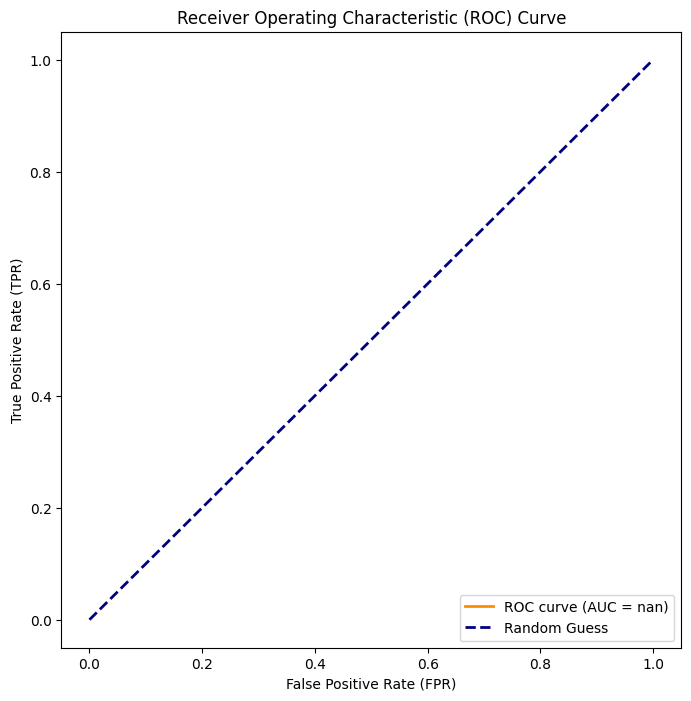

In [58]:
from sklearn.naive_bayes import GaussianNB

all_accuracy = []


for company in unique_companies[-5:]:
    company_data = df[df['Name'] == company]

    # Features
    X = company_data[['Previous', '12m Low', '12m High', 'Day Low', 'Day High', 'Day Price']]
    y = company_data['PriceMovement']

    # Split data into training and testing sets
    split = int(0.8 * len(company_data))
    X_train, y_train = X[:split], y[:split]
    X_test, y_test = X[split:], y[split:]

    # Initialize and train Gaussian Naive Bayes Classifier
    nb_classifier = GaussianNB()
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    nb_classifier.fit(X_train, y_train)

    y_test = y_test.astype(int)

    # Make predictions
    y_pred = nb_classifier.predict(X_test)

    # Evaluate Model Performance
    accuracy = accuracy_score(y_test, y_pred)
    all_accuracy.append(accuracy)

    # Print Classification Report
    print(classification_report(y_test, y_pred))

    # Cross-validation using 4 folds
    stratified_cv = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
    cv_scores = cross_val_score(nb_classifier, X, y, cv=stratified_cv, scoring=make_scorer(accuracy_score))
    
    # Display cross-validation scores
    print("\n Cross Validation for ", company)
    print("Cross-Validation Scores:", cv_scores)
    print("Mean Accuracy:", cv_scores.mean())
    print("Max Accuracy:", max(cv_scores))
    print("\n\n")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
